<a href="https://colab.research.google.com/github/harikrish2727/heart_stroke/blob/main/heart_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


**Load the dataset**

In [2]:
df = pd.read_csv("/content/heart_strokes.csv")

In [3]:
df.drop(["id"],axis=1,inplace=True)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df_cat = df[["gender","ever_married","work_type","Residence_type","smoking_status"]]  

In [7]:
df_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN


In [8]:
df_cont = df[["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"]]

In [9]:
df_cont.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0


In [10]:
df_cont.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [11]:
df.smoking_status.describe()

count            30108
unique               3
top       never smoked
freq             16053
Name: smoking_status, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

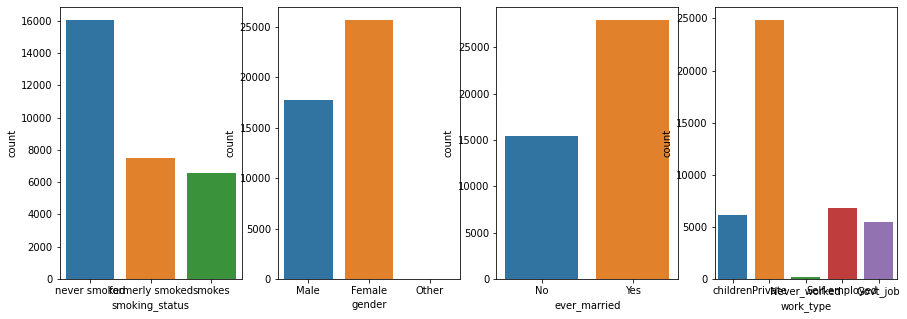

In [12]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,5))

sns.countplot(df.smoking_status,ax=ax1)
sns.countplot(df.gender,ax=ax2)
sns.countplot(df.ever_married,ax=ax3)
sns.countplot(df.work_type,ax=ax4)
plt.show()

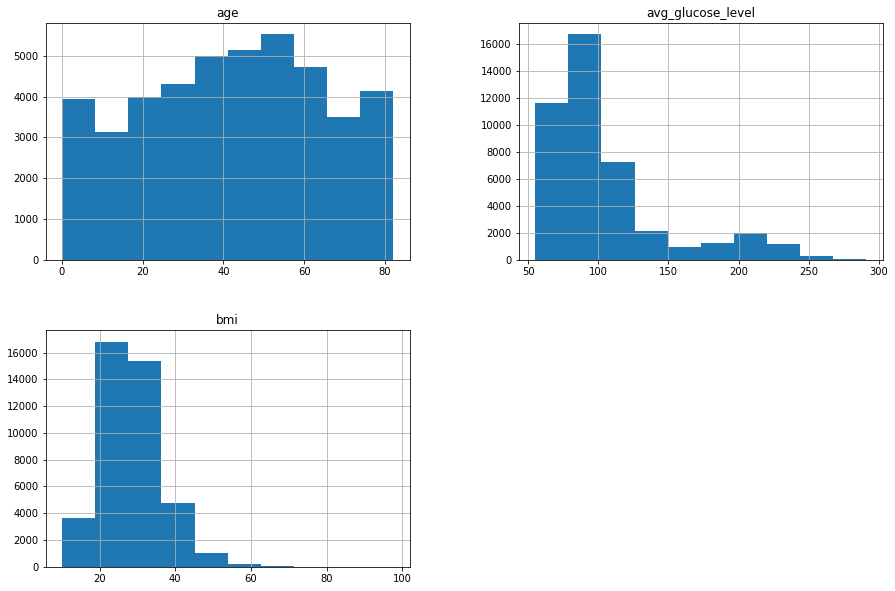

In [13]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

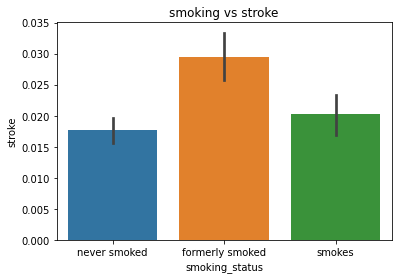

In [15]:
sns.barplot(x=df.smoking_status,y=df.stroke)
plt.title("smoking vs stroke")
plt.show()

**heart stroke occur more in smokers and people used to smoke than never smoked people**

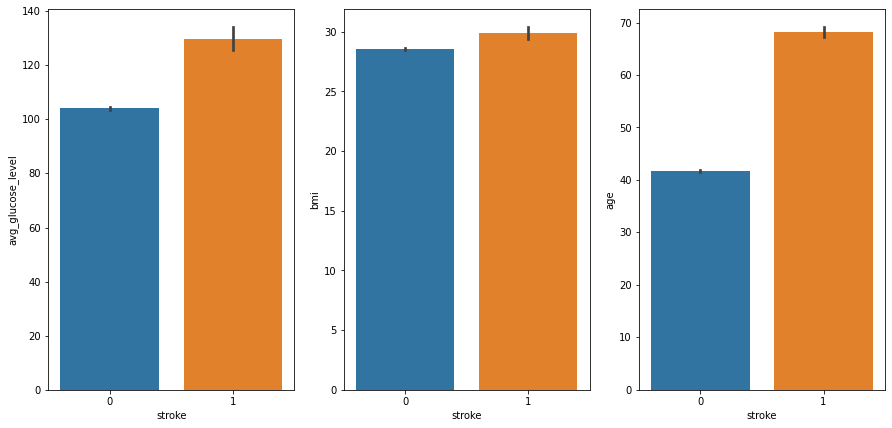

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7))

sns.barplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.barplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.barplot(x="stroke", y="age", data=df,ax=ax3)

**ageing can boost the chance of heart stroke, also high bmi and high glucose level lead to heart stroke**

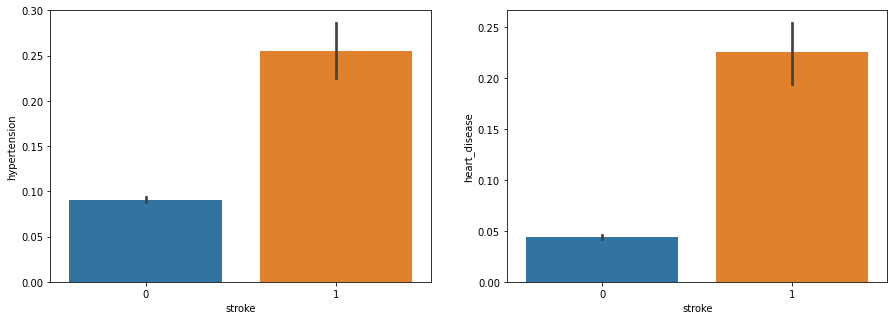

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x=df.stroke,y=df.hypertension,ax=ax1)
sns.barplot(x=df.stroke,y=df.heart_disease,ax=ax2)

**Hypertension and Heart desease can cause heart stroke**

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**bi variate analysis by group by of pandas**

**heart stroke in urban vs rural people**

In [19]:
temp = df
temp.stroke = temp.stroke.astype(int)
res_type = df.groupby(["Residence_type"])['stroke'].agg(['sum','count']).reset_index()
res_type['risk'] = res_type['sum'] / res_type['count'] * 100
res_type

,Residence_type,sum,count,risk
0,Rural,384,21644,1.774164
1,Urban,399,21756,1.833977


**Urban dwellers have high risk of heart stroke**

**Heart stroke in work category**

In [20]:
temp = df
work_type = df.groupby(['work_type'])["stroke"].agg(['sum','count']).reset_index()
work_type["risk"] = work_type["sum"]/work_type["count"] *100
work_type

,work_type,sum,count,risk
0,Govt_job,89,5440,1.636029
1,Never_worked,0,177,0.000000
2,Private,441,24834,1.775791
3,Self-employed,251,6793,3.694980
4,children,2,6156,0.032489


**People who are self employed has high risk of heart stroke,
children are less prone to heart stroke**

**Heart stroke in Smoke_type**

In [21]:
smoke_type = temp.groupby(["smoking_status"])["stroke"].agg(["sum","count"]).reset_index()
smoke_type["risk"] = smoke_type["sum"]/smoke_type["count"]*100
smoke_type

,smoking_status,sum,count,risk
0,formerly smoked,221,7493,2.949419
1,never smoked,284,16053,1.769140
2,smokes,133,6562,2.026821


**People who Never smoked are less prone to Heart strokes compared to people who smoke and used to smoke**

**Encoding**

**Label Encoding ever married column**

In [22]:
encoder = LabelEncoder()
df.loc[:,["ever_married"]] = encoder.fit_transform(df.loc[:,["ever_married"]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**One hot Encoding**

In [23]:
df = pd.get_dummies(df)

In [24]:
df.head(2)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,0,95.12,18.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,58.0,1,0,1,87.96,39.2,0,0,1,0,0,0,1,0,0,0,1,0,1,0


**Filling missing values**

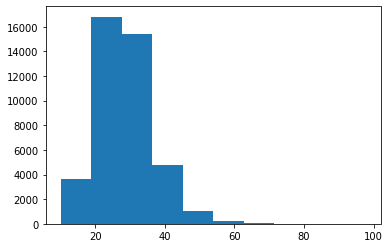

In [25]:
plt.hist(df.bmi)
plt.show()

**since the "bmi" column is right skewed we use "median" to fill the missing values with the help of "sklearn simple imputer library"**

In [26]:
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
df.loc[:,["bmi"]] = imputer.fit_transform(df.loc[:,["bmi"]])


In [27]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

**Filling missing values in "smoking_status" with KNN imputer of sklearn Library**

In [28]:
knnimputer = KNNImputer(missing_values=np.nan,n_neighbors=5,metric='nan_euclidean')
df.loc[:,["smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]] = knnimputer.fit_transform(df.loc[:,["smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]])

In [29]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [30]:
X = df.drop(["stroke"],axis=1)

In [31]:
y = df.stroke

checking Correlation

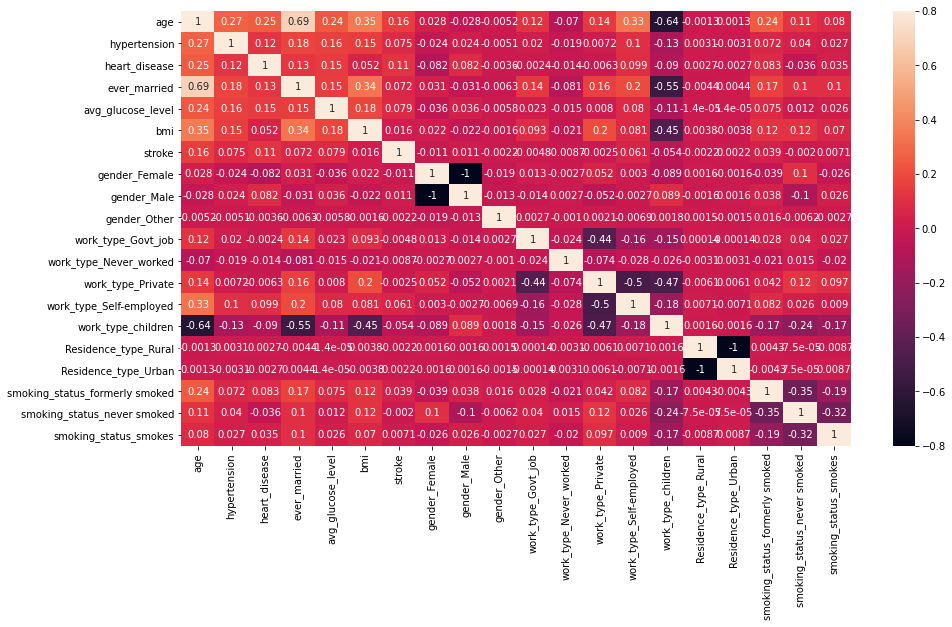

In [32]:
corrmetrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmetrix,vmin=-.8,vmax=.8,annot=True)
plt.show()


**Spliting dataset into training and testing**

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30380, 19), (13020, 19), (30380,), (13020,))

**Feature Scaling**

**Standard scaler**

In [35]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

**Logistic Regression**

In [36]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

**Confusion metrics and Classification report**

In [37]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))

Confusion_matrix is :
 [[12785     0]
 [  235     0]]


In [38]:
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

**Linear SVM**

In [39]:
classifier = SVC(kernel="linear",random_state=42,)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

**Confusion metrics and Classification report**

In [40]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))


Confusion_matrix is :
 [[12785     0]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RBF**

In [41]:
svm_ra=SVC(kernel='rbf',random_state=42)
svm_ra.fit(X_train,y_train)
y_pred=svm_ra.predict(X_test)

**confusion metrics and classification Report**

In [42]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))


Confusion_matrix is :
 [[12785     0]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Polinomial**

In [43]:
svm_po=SVC(kernel='poly',degree=3,random_state=42)
svm_po.fit(X_train,y_train)
y_pred=svm_po.predict(X_test)


**Confusion metrics,Accuracy score and Classification report**

In [44]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))


Accuracy is : 0.9819508448540707
Confusion_matrix is :
 [[12785     0]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [45]:
acc_values = []
neighbors = np.arange(3,16)
for i in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)
  

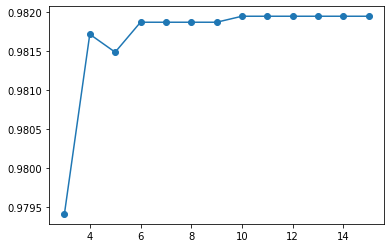

In [46]:
plt.plot(range(3,16),acc_values,'-o')
plt.show()

In [47]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

**Confusion Metrics Accuracy score and classification report**

In [48]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))


Accuracy is : 0.9819508448540707
Confusion_matrix is :
 [[12785     0]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Maximum accuracy got with K values of 10**

**Decision Tree**

In [49]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))




Accuracy is : 0.9627496159754224
Confusion_matrix is :
 [[12520   265]
 [  220    15]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12785
           1       0.05      0.06      0.06       235

    accuracy                           0.96     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.96      0.96     13020



**parameter tuning**

In [50]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=42,min_samples_split=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))




Accuracy is : 0.9674347158218126
Confusion_matrix is :
 [[12583   202]
 [  222    13]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12785
           1       0.06      0.06      0.06       235

    accuracy                           0.97     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.97      0.97     13020



**Random Forest Classifier**

In [51]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.9817204301075269
Confusion_matrix is :
 [[12782     3]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



**Parameter Tuning**

In [52]:
rf=RandomForestClassifier(n_estimators=25,criterion="entropy",random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.9816436251920123
Confusion_matrix is :
 [[12779     6]
 [  233     2]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.25      0.01      0.02       235

    accuracy                           0.98     13020
   macro avg       0.62      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



**Gradient Boost**

In [53]:
classifier = GradientBoostingClassifier(random_state=42)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))


Accuracy is 0.9815668202764977
Confusion_matrix is :
 [[12779     6]
 [  234     1]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.14      0.00      0.01       235

    accuracy                           0.98     13020
   macro avg       0.56      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



**XG boost**

In [54]:
xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train,y_train)
y_pred = xgbc.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.9819508448540707
Confusion_matrix is :
 [[12785     0]
 [  235     0]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree with Parameter tuning gave most accurate prediction**